In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal
from IPython.display import display
import qtpu

In [2]:
from benchmark.util import plot_pareto_front
from benchmark.benchmarks import generate_benchmark

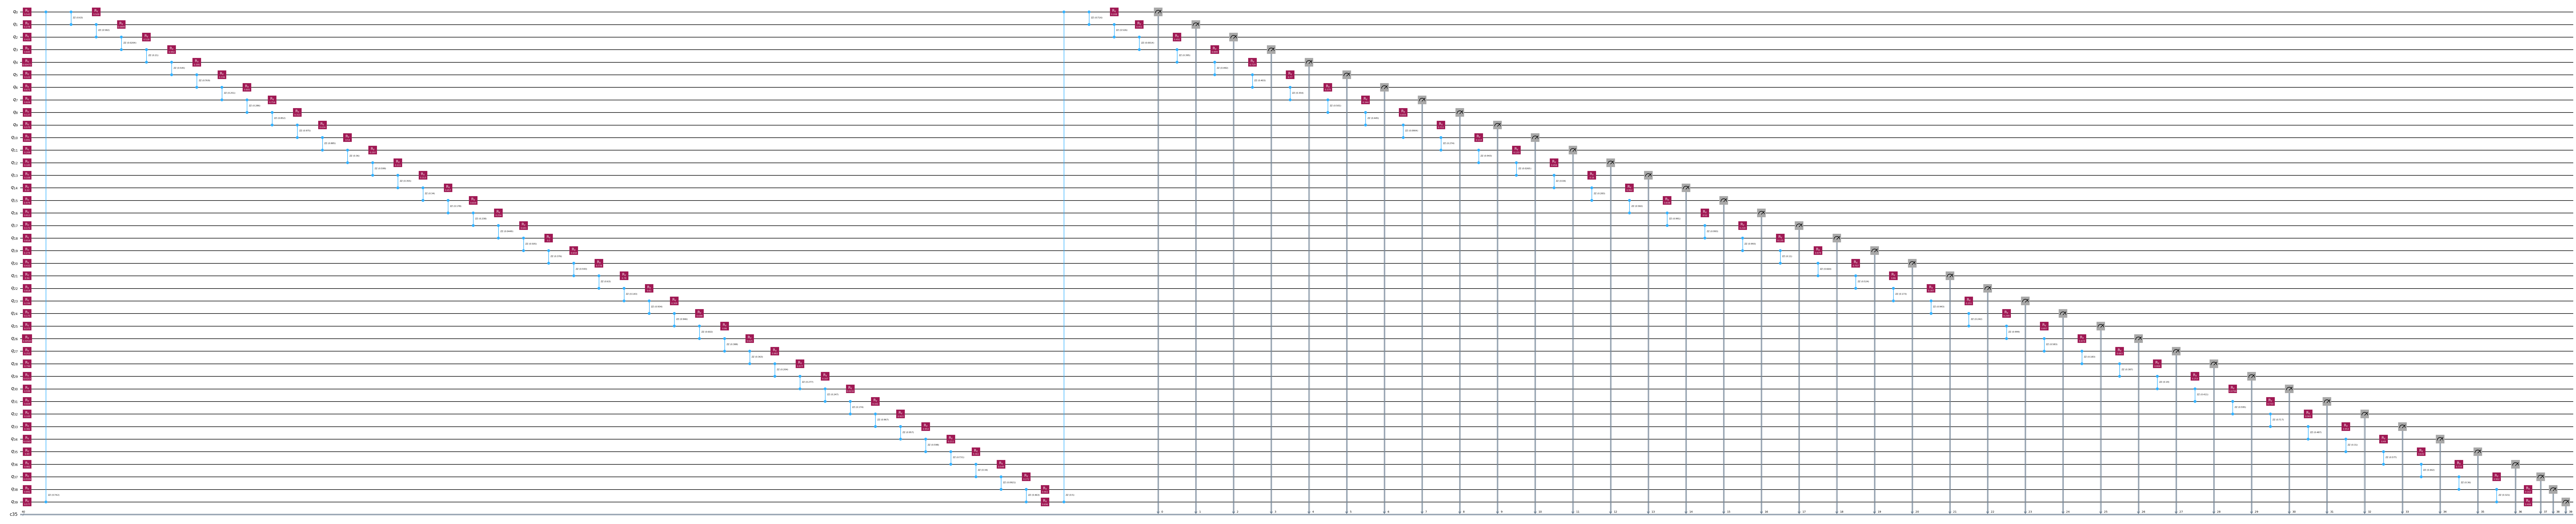

In [8]:
bench = generate_benchmark("twolocal_2", 40)
bench.draw('mpl', fold=-1)

In [13]:
from qtpu.compiler import hyper_optimize
from qtpu.compiler.compiler import find_best_trial, trial_to_hybrid_tn

study = hyper_optimize(bench, max_cost=(0, 200000), show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

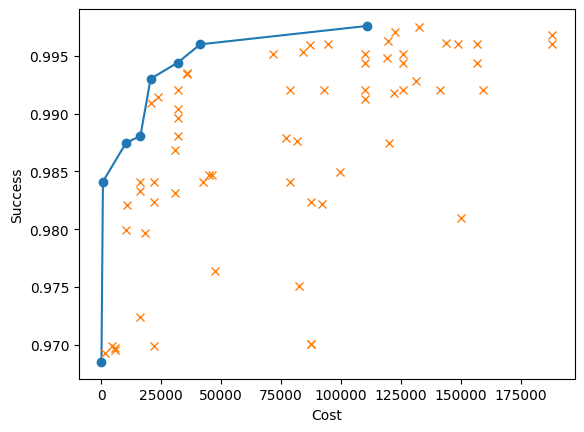

In [14]:
fig, ax = plt.subplots()

plot_pareto_front(study, ax)
ax;

In [15]:
trial = find_best_trial(study, 0)
htn = trial_to_hybrid_tn(trial)
trial

FrozenTrial(number=77, state=1, values=[20500.0, 0.9930240953515693], datetime_start=datetime.datetime(2024, 6, 9, 13, 3, 3, 686439), datetime_complete=datetime.datetime(2024, 6, 9, 13, 3, 3, 735757), params={'max_cost': 52321, 'compress': '2q', 'choose_leaf': 'random', 'random_strength': 7.784734337816502, 'weight_edges': 'const', 'imbalance': 0.1461785411034318, 'imbalance_decay': 3.593444661468709, 'parts': 9, 'parts_decay': 0.9391860433172441, 'mode': 'direct', 'objective': 'km1', 'fix_output_nodes': ''}, user_attrs={'ir': <qtpu.compiler.compress.CompressedIR object at 0x7f97758a0d50>, 'tree': <ContractionTree(N=240, branches=10, complete=False)>}, system_attrs={'nsga2:generation': 1}, intermediate_values={}, distributions={'max_cost': IntDistribution(high=200000, log=False, low=0, step=1), 'compress': CategoricalDistribution(choices=('qubits', '2q', 'none')), 'choose_leaf': CategoricalDistribution(choices=('qubits', 'nodes', 'random')), 'random_strength': FloatDistribution(high=10

In [16]:
for qtens in htn.quantum_tensors:
    print(qtens.circuit.num_qubits)

1
11
11
1
5
5
11
9
1
1
1
